# Simulaties team Euler

In [104]:
from procedures import *
import matplotlib.pyplot as plt
import numpy as np

### Simulatie 1: OLS vs KNN

Genereer een steekproef (xi, 10^xi + ϵi) van 20 punten met een standaardnormaal verdeeld residu en een uniform verdeelde regressor tussen 0 en 1. Stel de steekproef grafisch voor, voeg de populatiefunctie toe, de regressielijn en de KNN-modellen voor K = 1, K = K_opt (zie simulatie 3, gebruik voorlopig K = 5) en K = 20. Gebruik deze figuur in het eindverslag om de verschillen tussen lineaire en KNN regressie uit te leggen.

In [105]:
# creëer een vector met 20 x-waarden tussen 0 en 1
xVector = xsample(20,0,1)

# de functie die we gebruiken om de datapoints te genereren
def f(x):
    return 10**x

# creëer een vector met de y-waarden die elk een error-term toevoegen aan de functiewaarde
# deze errortermen hebben gemiddelde waarde 0 en standaardafwijking e=1
yVector = ysample(xVector,f)

# bereken de helling a en de intercept b van de regressielijn
a,b = ols(yVector,xVector)

# de functie f^ (f met een hoedje)
def geschatteFunctie(x):
    return a*x + b

# bereken de voorspellingen van de KNN methode voor k=1 en k=5
# deze voorspellingswaarden berekenen we voor veel punten in het interval [0,1] zodat we ze mooi kunnen plotten
KNNxWaarden = np.linspace(0, 1, 500)
KNN1 = knn(KNNxWaarden, yVector, xVector, 1)
KNN5 = knn(KNNxWaarden, yVector, xVector, 5)
KNN20 = knn(KNNxWaarden, yVector, xVector, 20)

Alles in 1 grafiek:

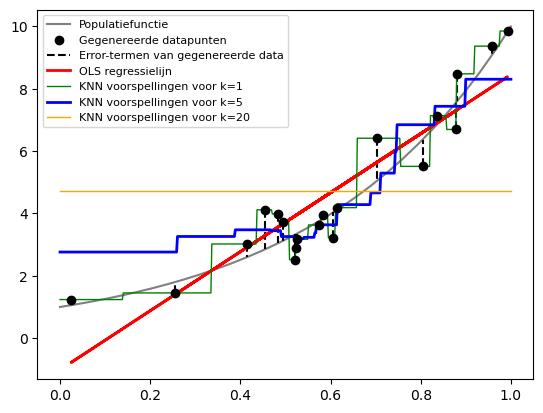

In [106]:
plt.figure()
plt.plot(np.linspace(0, 1, 30), f(np.linspace(0, 1, 30)), color='grey', label="Populatiefunctie")
plt.scatter(xVector, yVector, c='k', label="Gegenereerde datapunten", zorder=3)
plt.vlines(xVector, yVector, f(xVector), colors='black', linestyles='dashed', label="Error-termen van gegenereerde data")
plt.plot(xVector, geschatteFunctie(xVector),'r-', lw=2 ,label="OLS regressielijn")
plt.plot(KNNxWaarden, KNN1, 'g-', lw=1, label="KNN voorspellingen voor k=1")
plt.plot(KNNxWaarden, KNN5, 'b-', lw=2, label="KNN voorspellingen voor k=5")
plt.plot(KNNxWaarden, KNN20, color='orange', lw=1, label="KNN voorspellingen voor k=20")
plt.legend(fontsize="8")
plt.show()

De twee regressiemethoden in twee verschillende grafieken:

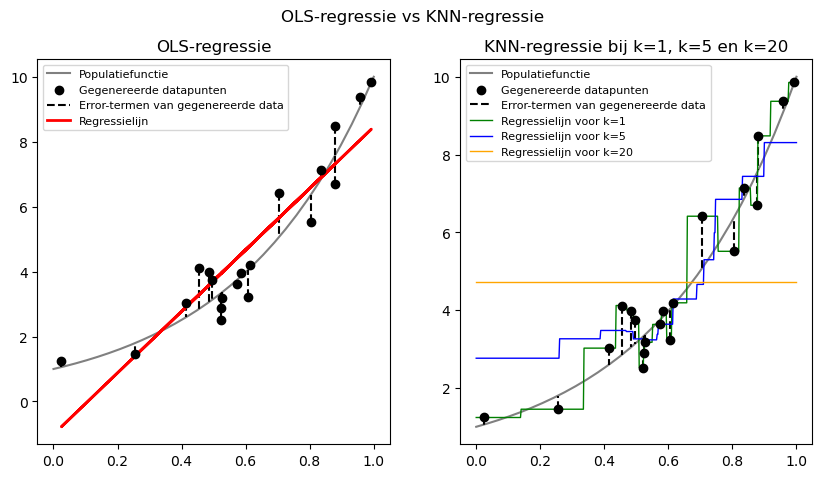

In [107]:
plt.figure(figsize=(10,5))
plt.suptitle("OLS-regressie vs KNN-regressie")

# Linkse grafiek: OLS-regressie
plt1 = plt.subplot(1,2,1)
plt1.set_title("OLS-regressie")
plt1.plot(np.linspace(0, 1, 30), f(np.linspace(0, 1, 30)), color='grey', label="Populatiefunctie")
plt1.scatter(xVector, yVector, c='k', label="Gegenereerde datapunten", zorder=3)
plt1.vlines(xVector, yVector, f(xVector), colors='black', linestyles='dashed', label="Error-termen van gegenereerde data")
plt1.plot(xVector, geschatteFunctie(xVector),'r-', lw=2 ,label="Regressielijn")
plt1.legend(fontsize="8")

# Rechtse grafiek: KNN-regressie
plt2 = plt.subplot(1,2,2)
plt2.set_title("KNN-regressie bij k=1, k=5 en k=20")
plt2.plot(np.linspace(0, 1, 30), f(np.linspace(0, 1, 30)), color='grey', label="Populatiefunctie")
plt2.scatter(xVector, yVector, c='k', label="Gegenereerde datapunten", zorder=3)
plt2.vlines(xVector, yVector, f(xVector), colors='black', linestyles='dashed', label="Error-termen van gegenereerde data")
plt2.plot(KNNxWaarden, KNN1, 'g-', lw=1, label="Regressielijn voor k=1")
plt2.plot(KNNxWaarden, KNN5, 'b-', lw=1, label="Regressielijn voor k=5")
plt2.plot(KNNxWaarden, KNN20, color='orange', lw=1, label="Regressielijn voor k=20")
plt.legend(fontsize="8")
plt.show()

### Simulatie 2: Reducibele en irreducibele fout

TODO.

### Simulatie 3: K_opt bepalen bij KNN-regressie

TODO.

### Simulatie 4: Meervoudige regressie

Genereer een steekproef (x_i1, x_i2, 1+x_i1+x_i2+ϵ_i) van 20 punten met een standaardnormaal verdeeld residu en beide regressoren uniform verdeeld tussen 0 en 1. Stel de steekproef voor op een figuur, voeg de populatiefunctie toe, het regressievlak en de KNN-modellen voor K = 1, K_opt en K = 20. Gebruik uiteraard validatie om K = K_opt te bepalen.

In [108]:
# Stel voorlopig even K_opt = 5 want we hebben simulatie 3 nog niet gedaan
K_opt = 5

In [109]:
# x_i1
xVector1 = xsample(20,0,1)
# x_i2
xVector2 = xsample(20,0,1)
# x_i1 + x_i2
som = xVector1+xVector2

def f(x):
    return x

yVector = ysample(som,f)
xMatrix = np.array([xVector1,xVector2])

beta = mls(yVector,xMatrix)
print(beta)

ValueError: operands could not be broadcast together with shapes (20,2) (20,) 